# **LIBRARY YANG DIGUNAKAN**

In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### **LINK DATASET** : https://www.kaggle.com/datasets/antoreepjana/military-tanks-dataset-images

# **MEMUAT DATASET**

In [45]:
img_path = r"C:\Users\M. ARIANDA SAPUTRA\Documents\4A Games\Posttest_KB_7\images"
os.listdir(img_path)

['type_98', 'vickers_mk4', 'vt2', 'zulfiqar_1']

# **SPLIT DATASET**

In [46]:
from sklearn.model_selection import train_test_split
import os
import shutil

In [47]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Tentukan rasio pembagian dataset
train_ratio = 0.7  # 70% data train
test_ratio = 0.15  # 15% data test
val_ratio = 0.15   # 15% data validation

# Direktori sumber dataset
source_data_dir = r"C:\Users\M. ARIANDA SAPUTRA\Documents\4A Games\Posttest_KB_7\images"

# Direktori target untuk data train, test, dan validation
train_dir = r'C:/Users/M. ARIANDA SAPUTRA/Documents/4A Games/Posttest_KB_7/train'
test_dir = r'C:/Users/M. ARIANDA SAPUTRA/Documents/4A Games/Posttest_KB_7/test'
val_dir = r'C:/Users/M. ARIANDA SAPUTRA/Documents/4A Games/Posttest_KB_7/validation'

# Buat direktori target jika belum ada
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# List semua file dalam direktori sumber dataset
file_list = os.listdir(source_data_dir)

# Bagi dataset menjadi train, test, dan validation
train_files, test_val_files = train_test_split(file_list, test_size=(test_ratio + val_ratio), random_state=42)
test_files, val_files = train_test_split(test_val_files, test_size=(val_ratio / (test_ratio + val_ratio)), random_state=42)

# Pindahkan file ke direktori target untuk masing-masing set
def move_files(source_files, target_dir):
    for fname in source_files:
        source_path = os.path.join(source_data_dir, fname)
        target_path = os.path.join(target_dir, fname)
        shutil.move(source_path, target_path)

move_files(train_files, train_dir)
move_files(test_files, test_dir)
move_files(val_files, val_dir)


# **AUGMENTASI DATA**

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dimensi gambar
img_width, img_height = 150, 150 

# Jumlah batch yang digunakan dalam pelatihan dan validasi
batch_size = 32

# Tentukan parameter augmentasi yang Anda inginkan
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Skala nilai piksel ke [0, 1]
    rotation_range=20,  # Rentang rotasi gambar
    width_shift_range=0.2,  # Rentang pergeseran horizontal
    height_shift_range=0.2,  # Rentang pergeseran vertikal
    shear_range=0.2,  # Rentang pemotongan
    zoom_range=0.2,  # Rentang zoom
    horizontal_flip=True,  # Flip horizontal
    fill_mode='nearest'  # Mode pengisian piksel yang hilang
)

# Buat generator data untuk setiap bagian dataset (train, test, validation)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 12 images belonging to 2 classes.
Found 3 images belonging to 1 classes.
Found 10 images belonging to 1 classes.


# **ARSITEKTUR MODEL**

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(img_width,img_height,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])

In [73]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)
callback_list = [early_stopping, model_checkpoint]

- **MENGKOMPILE MODEL**

In [74]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])     

- **PELATIHAN MODEL**

In [75]:
history = model.fit(train_generator,
                validation_data = validation_generator,
                epochs=10,
                callbacks=callback_list ,
                )

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.2226 - accuracy: 0.8333 - val_loss: 4.9506 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.2482 - accuracy: 0.7500 - val_loss: 1.7398 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 868ms/step - loss: 0.4093 - accuracy: 1.0000 - val_loss: 3.4554 - val_accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 1s 939ms/step - loss: 0.3168 - accuracy: 0.8333 - val_loss: 4.8587 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 854ms/step - loss: 0.3991 - accuracy: 0.7500 - val_loss: 4.1722 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 910ms/step - loss: 0.2583 - accuracy: 0.7500 - val_loss: 3.9836 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 945ms/step - loss: 0.2361 - accuracy: 0.8333 - val_loss: 4.3662 - val_accuracy: 1.0000
Epoch 8/10
1/1 [==========

# **EVALUASI MODEL**

In [78]:
# Evaluasi model terhadap data tes
test_loss, test_accuracy = model.evaluate(test_generator)

# Cetak hasil evaluasi
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 137ms/step - loss: 1.4669 - accuracy: 1.0000
Test Loss: 1.4669255018234253
Test Accuracy: 1.0


# **MEMBUAT GRAFIK UNTUK MENAMPILKAN PERGERAKAN METRIK**

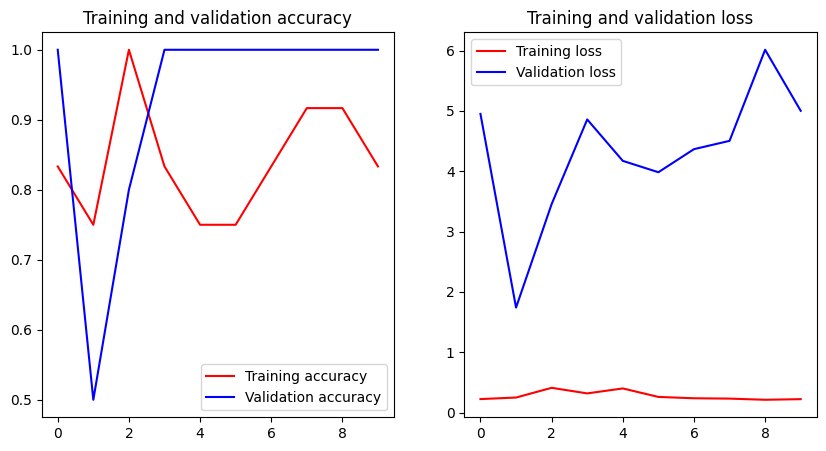

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
